## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [25]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [26]:
path = r'D:\WORK\Bootcamp\6\Project\Data'

In [27]:
df =pd.read_csv(os.path.join(path,'Prepared','Chocolate Bars',"Updated_Data6.csv"), index_col = False)

In [28]:
df.shape

(1714, 18)

In [29]:
df.head()

,Unnamed: 0,Company_(Maker-if known),Specific Bean Origin_or Bar Name,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Broad Bean_Origin,Company Latitude,Company Logitude,Company_Location_Count,Location Rarity Classification,Cocoa Amount Group,Bean Origin Longitude,Bean Origin Latitude,Bean_Origin_Count,Bean_Origin_Category
0,0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome,46.6,2.21,144,somewhat common,Light Amount,6.6131,0.186400,1,Extra Rare
1,1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo,46.6,2.21,144,somewhat common,Average Amount,0.8248,8.619500,1,Extra Rare
2,2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo,46.6,2.21,144,somewhat common,Average Amount,0.8248,8.619500,1,Extra Rare
3,3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo,46.6,2.21,144,somewhat common,Average Amount,0.8248,8.619500,1,Extra Rare
4,4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru,46.6,2.21,144,somewhat common,Average Amount,-75.0152,-9.189967,1,Extra Rare


In [30]:
#df.rename(columns = {'X1 transaction date' : 'Date', 'X2 house age': 'House age', 'X3 distance to the nearest MRT station': 'D. metro', 'X4 number of convenience stores': 'N. shops', 'Y house price of unit area': 'Price per unit', 'X5 latitude' : 'Latitude', 'X6 longitude' : 'Longitude' }, inplace = True)

# Clean

In [31]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Unnamed: 0                          0
Company_(Maker-if known)            0
Specific Bean Origin_or Bar Name    0
REF                                 0
Review_Date                         0
Cocoa_Percent                       0
Company_Location                    0
Rating                              0
Broad Bean_Origin                   0
Company Latitude                    0
Company Logitude                    0
Company_Location_Count              0
Location Rarity Classification      0
Cocoa Amount Group                  0
Bean Origin Longitude               0
Bean Origin Latitude                0
Bean_Origin_Count                   0
Bean_Origin_Category                0
dtype: int64

In [32]:
# remove the columns with non numeric data and unnessary
df = df.drop(columns=['Broad Bean_Origin','Company_Location','Company_(Maker-if known)','Specific Bean Origin_or Bar Name','Location Rarity Classification','Cocoa Amount Group','Bean_Origin_Category'])

In [33]:
df.head(10)

,Unnamed: 0,REF,Review_Date,Cocoa_Percent,Rating,Company Latitude,Company Logitude,Company_Location_Count,Bean Origin Longitude,Bean Origin Latitude,Bean_Origin_Count
0,0,1876,2016,0.63,3.75,46.6,2.21,144,6.6131,0.186400,1
1,1,1676,2015,0.70,2.75,46.6,2.21,144,0.8248,8.619500,1
2,2,1676,2015,0.70,3.00,46.6,2.21,144,0.8248,8.619500,1
3,3,1680,2015,0.70,3.50,46.6,2.21,144,0.8248,8.619500,1
4,4,1704,2015,0.70,3.50,46.6,2.21,144,-75.0152,-9.189967,1
5,5,1315,2014,0.70,2.75,46.6,2.21,144,-66.5897,6.423800,1
6,6,1315,2014,0.70,3.50,46.6,2.21,144,-77.7812,21.521800,6
7,7,1315,2014,0.70,3.50,46.6,2.21,144,-66.5897,6.423800,6
8,8,1319,2014,0.70,3.75,46.6,2.21,144,-66.5897,6.423800,2
9,9,1319,2014,0.70,4.00,46.6,2.21,144,-75.0152,-9.189967,1


### 2. The elbow technique

In [34]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [35]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1146293494.7199032,
 -829282023.3675922,
 -580273350.9851831,
 -440318411.21617615,
 -384723202.4648725,
 -325831909.8946532,
 -301827615.9153459,
 -245254843.54075658,
 -224163901.25624287]

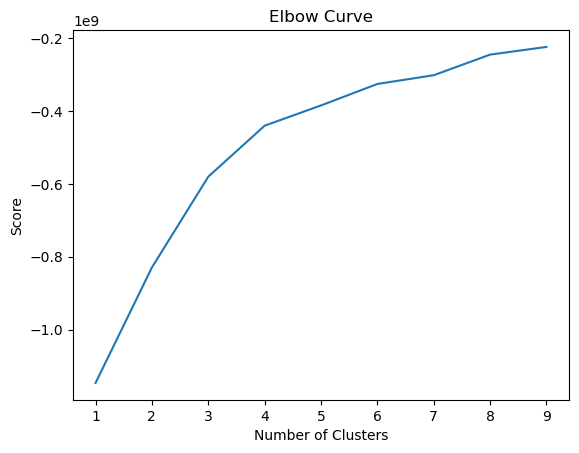

In [36]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [37]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [38]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [39]:
df['clusters'] = kmeans.fit_predict(df)

In [40]:
df.head()

,Unnamed: 0,REF,Review_Date,Cocoa_Percent,Rating,Company Latitude,Company Logitude,Company_Location_Count,Bean Origin Longitude,Bean Origin Latitude,Bean_Origin_Count,clusters
0,0,1876,2016,0.63,3.75,46.6,2.21,144,6.6131,0.186400,1,2
1,1,1676,2015,0.70,2.75,46.6,2.21,144,0.8248,8.619500,1,2
2,2,1676,2015,0.70,3.00,46.6,2.21,144,0.8248,8.619500,1,2
3,3,1680,2015,0.70,3.50,46.6,2.21,144,0.8248,8.619500,1,2
4,4,1704,2015,0.70,3.50,46.6,2.21,144,-75.0152,-9.189967,1,2


In [41]:
df['clusters'].value_counts()

clusters
1    613
0    577
2    524
Name: count, dtype: int64

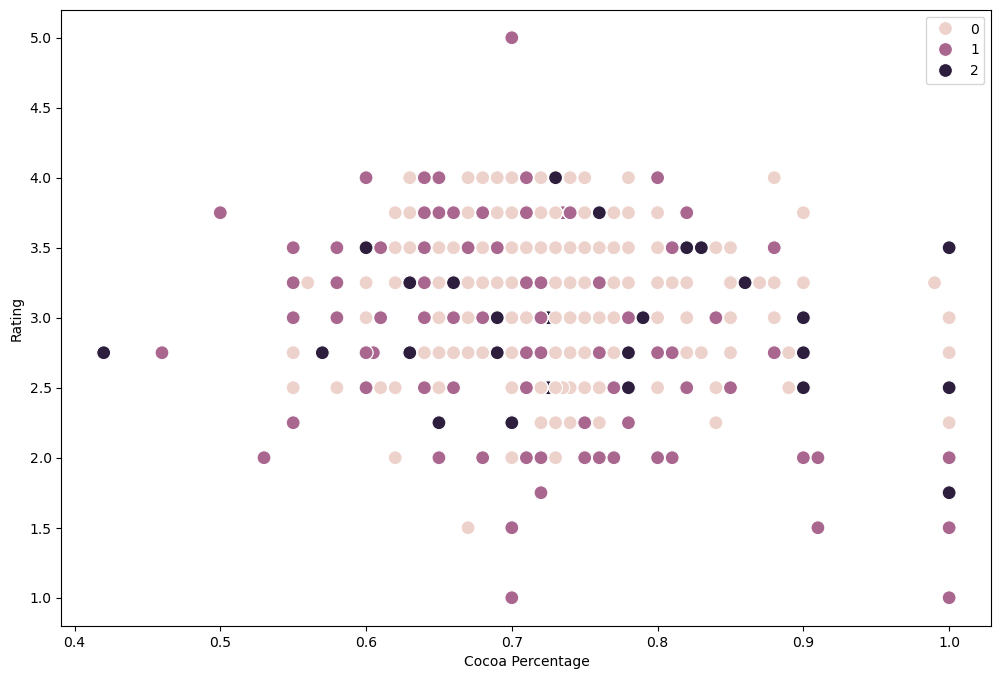

In [42]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Cocoa_Percent'], y=df['Rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cocoa Percentage') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

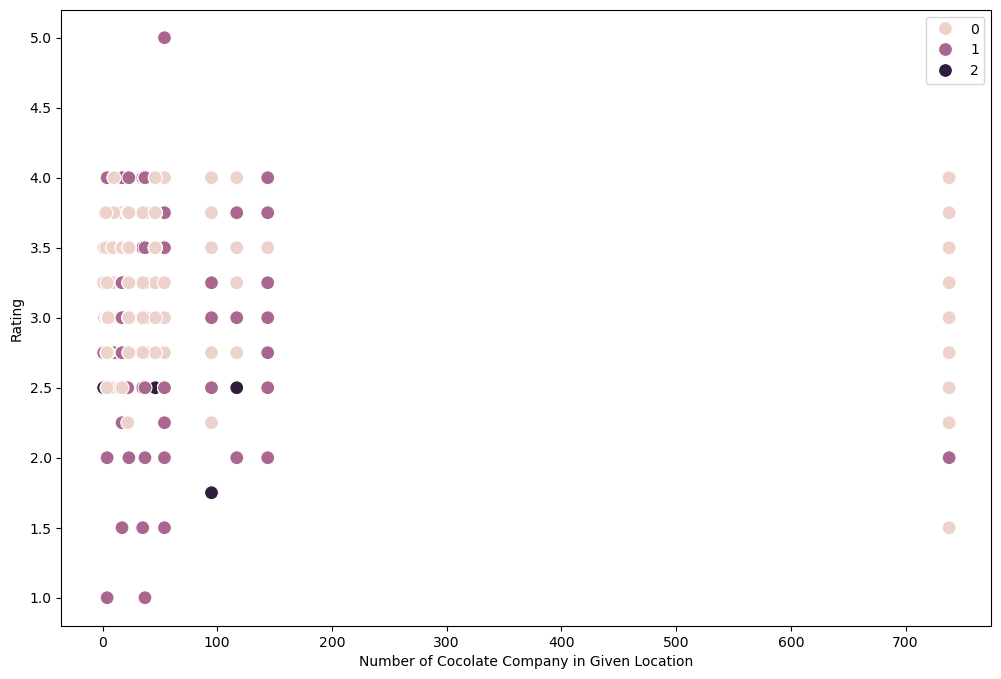

In [43]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Company_Location_Count'], y=df['Rating'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Cocolate Company in Given Location') 
plt.ylabel('Rating') 
plt.show()

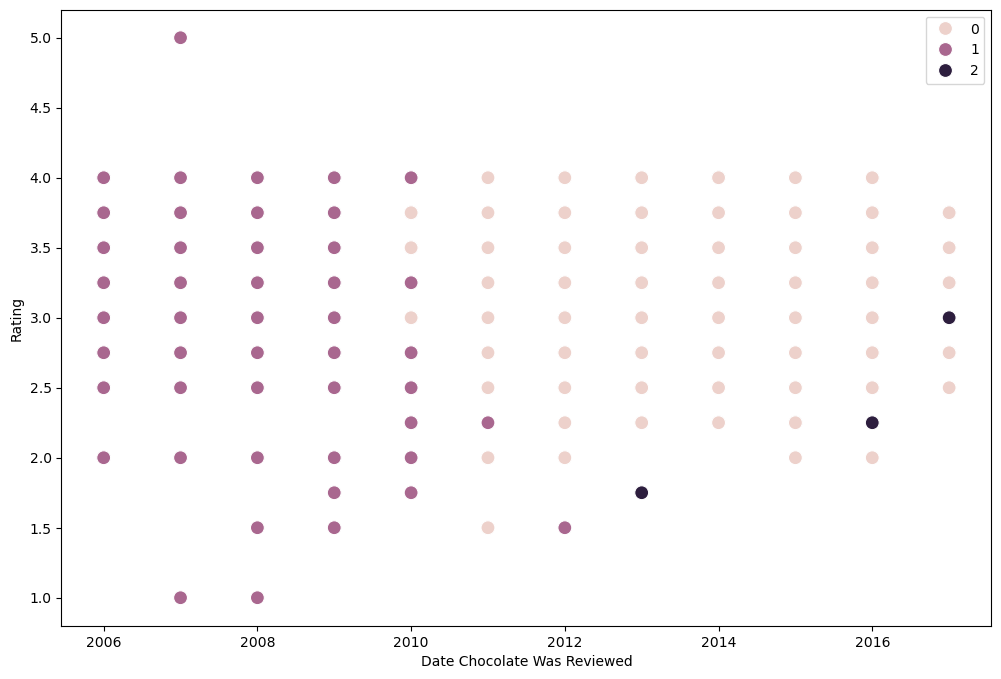

In [44]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Review_Date'], y=df['Rating'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Date Chocolate Was Reviewed') 
plt.ylabel('Rating') 
plt.show()

In [45]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [46]:
df.columns

Index(['Unnamed: 0', 'REF', 'Review_Date', 'Cocoa_Percent', 'Rating',
       'Company Latitude', 'Company Logitude', 'Company_Location_Count',
       'Bean Origin Longitude', 'Bean Origin Latitude', 'Bean_Origin_Count',
       'clusters', 'cluster'],
      dtype='object')

In [47]:
df.groupby('cluster').agg({'REF':['mean', 'median'], 
                         'Review_Date':['mean', 'median'], 
                         'Cocoa_Percent':['mean', 'median'],
                          'Rating':['mean', 'median'],
                          'Company Latitude':['mean', 'median'],
                          'Company Logitude':['mean', 'median'],
                          'Company_Location_Count':['mean', 'median'],
                          'Bean Origin Longitude':['mean', 'median'],
                          'Bean Origin Latitude':['mean', 'median']})

REF          Review_Date         Cocoa_Percent         \
                    mean  median         mean  median          mean median   
cluster                                                                      
dark purple  1465.372137  1466.0  2014.540076  2015.0      0.717137    0.7   
pink         1321.915078  1335.0  2013.889081  2014.0      0.720789    0.7   
purple        445.601958   431.0  2009.215334  2009.0      0.714062    0.7   

               Rating        Company Latitude        Company Logitude         \
                 mean median             mean median             mean median   
cluster                                                                        
dark purple  3.220420   3.25        35.256489  37.09       -49.112195 -95.71   
pink         3.217071   3.25        33.790364  37.09       -50.399081 -95.71   
purple       3.156607   3.00        34.196917  37.09       -38.227667  -4.20   

            Company_Location_Count        Bean Origin Longitude           \
                              mean median                  mean   median   
cluster                                                                    
dark purple             407.532443  738.0            -45.968070 -70.1627   
pink                    384.246101  144.0            -39.908543 -70.1627   
purple                  275.464927   95.0            -40.332425 -66.5897   

            Bean Origin Latitude          
                            mean  median  
cluster                                   
dark purple             3.233219  6.4238  
pink                    1.754002  0.1864  
purple                  2.525618  6.4238

# Export

In [48]:
df.to_csv(os.path.join(path,'Prepared','Chocolate Bars',"Updated_Data7.csv"))

# Questions and Answers
### Reflect On What I Learned
I can see that the margin of difference between these clusters, in terms of rating, is only slightly different. However, it does seem that the Company_Location_Count, which represents the number of reviews for each Company_Location (e.g., USA companies have a total of 737 chocolate reviews based on the number of rows with the Company_Location as USA), reveals a pattern. This leads me to believe that companies with fewer chocolate companies or companies that were reviewed less may have a slight advantage in terms of their ratings in this survey.

__--__

### Propose what these results could be useful for in future steps of an analytics pipeline.
As the previous data exercises illustrated, the correlation between chocolate ratings and any specific variable is not very strong. This suggests that I will be more inclined to prove that people's preferences vary more than they are similar. 

__--__
